<a href="https://colab.research.google.com/github/johnh1987/Machine_learning/blob/main/Copy_of_fcc_cat_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [3]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 10
IMG_HEIGHT = 150
IMG_WIDTH = 150

--2025-01-06 13:47:41--  https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.3.33, 104.26.2.33, 172.67.70.149, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.3.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70702765 (67M) [application/zip]
Saving to: ‘cats_and_dogs.zip.1’

cats_and_dogs.zip.1 100%[===================>]  67.43M   199MB/s    in 0.3s    

2025-01-06 13:47:42 (199 MB/s) - ‘cats_and_dogs.zip.1’ saved [70702765/70702765]

Archive:  cats_and_dogs.zip
replace cats_and_dogs/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace __MACOSX/cats_and_dogs/._.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [4]:
# 3

train_image_generator      = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator       = ImageDataGenerator(rescale=1./255)

train_generated_images = train_image_generator.flow_from_directory(
                    train_dir,
                    target_size=(IMG_HEIGHT, IMG_WIDTH),
                    batch_size=batch_size,
                    class_mode='binary')

validation_generated_images  = validation_image_generator.flow_from_directory(
                    validation_dir,
                    target_size=(IMG_HEIGHT, IMG_WIDTH),
                    batch_size=batch_size,
                    class_mode='binary')

test_generated_images  = test_image_generator.flow_from_directory(
                    PATH,
                    target_size=(IMG_HEIGHT, IMG_WIDTH),
                    batch_size=batch_size,
                    classes=['test'],
                    shuffle=False)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


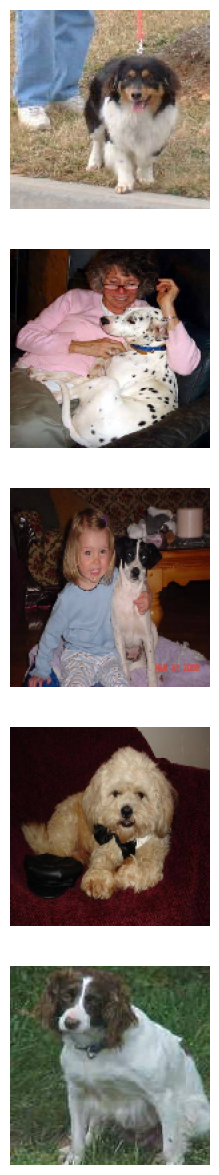

In [5]:
# 4
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_generated_images)
plotImages(sample_training_images[:5])


In [6]:
# 5
train_image_generator = ImageDataGenerator(
                            rescale=1./255,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            horizontal_flip=True,
                            vertical_flip=True,
                            zoom_range=0.3,
                            rotation_range=10,
                            fill_mode="nearest")


Found 2000 images belonging to 2 classes.


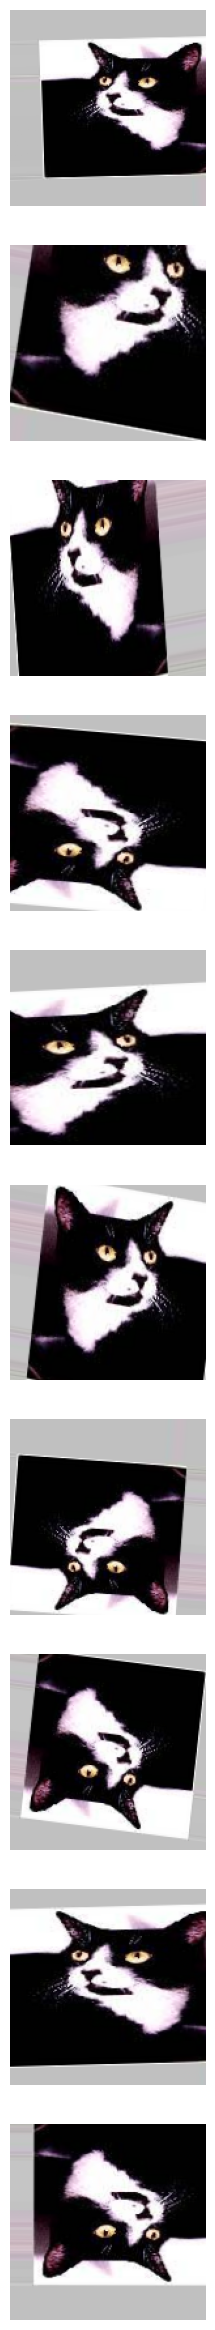

In [7]:
# 6
train_generated_images = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_generated_images[0][0][0] for i in range(10)]

plotImages(augmented_images)

In [8]:
# 7
model = Sequential()
model.add(Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
model.add(Conv2D(64, (5,5)))
model.add(MaxPooling2D(pool_size=(5, 5)))
model.add(Conv2D(128, (3,3)))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(256, (5,5)))
model.add(MaxPooling2D(pool_size=(5, 5)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])






model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 146, 146, 64)        │           4,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 29, 29, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 27, 27, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 9, 9, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 5, 5, 256)           │         819,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,030,273 (3.93 MB)

 Trainable params: 1,030,273 (3.93 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# 8
history =  model.fit(
            train_generated_images, #steps_per_epoch=train_steps,
            validation_data=validation_generated_images, #validation_steps=val_steps,
            epochs=epochs)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


16/16 ━━━━━━━━━━━━━━━━━━━━ 126s 7s/step - accuracy: 0.4949 - loss: 0.7576 - val_accuracy: 0.5000 - val_loss: 0.6885
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 112s 7s/step - accuracy: 0.5668 - loss: 0.6778 - val_accuracy: 0.6150 - val_loss: 0.6570
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 113s 7s/step - accuracy: 0.5943 - loss: 0.6698 - val_accuracy: 0.6090 - val_loss: 0.6645
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 115s 7s/step - accuracy: 0.5782 - loss: 0.6755 - val_accuracy: 0.5090 - val_loss: 0.7959
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 116s 7s/step - accuracy: 0.5975 - loss: 0.6775 - val_accuracy: 0.5390 - val_loss: 0.6903
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 115s 7s/step - accuracy: 0.5994 - loss: 0.6602 - val_accuracy: 0.6190 - val_loss: 0.6421
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 118s 7s/step - accuracy: 0.6396 - loss: 0.6455 - val_accuracy: 0.6490 - val_loss: 0.6284
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 114s 7s/step - accuracy: 0.6318 - loss: 0.6426 - val_accuracy: 0.6730 - val_loss: 0.

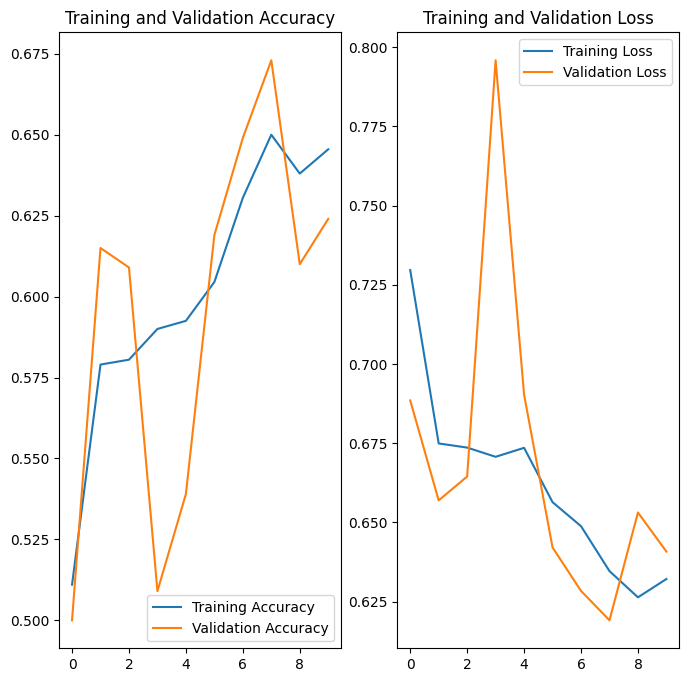

In [10]:
# 9
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [11]:
probabilities = model.predict(test_generated_images).flatten()
probabilities

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 839ms/step


array([0.6047424 , 0.37439856, 0.33042762, 0.8684557 , 0.64282304,
       0.7827342 , 0.7062592 , 0.38950592, 0.8490615 , 0.75427   ,
       0.679225  , 0.68951774, 0.8135005 , 0.61837745, 0.7534906 ,
       0.6951574 , 0.7260318 , 0.8779061 , 0.70030576, 0.747409  ,
       0.48140895, 0.760661  , 0.542063  , 0.7544161 , 0.53999543,
       0.71255636, 0.9390443 , 0.593157  , 0.38409936, 0.5783115 ,
       0.5021198 , 0.49496916, 0.84423375, 0.97125936, 0.5389904 ,
       0.671347  , 0.955798  , 0.8667264 , 0.6288867 , 0.5915314 ,
       0.62788224, 0.46022612, 0.8414721 , 0.6322301 , 0.5144035 ,
       0.644454  , 0.6259399 , 0.592381  , 0.70835185, 0.41719672],
      dtype=float32)

In [12]:
# 11
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 64.0% of the images of cats and dogs.
You passed the challenge!
